In [1]:
import os
os.chdir('C:\\stat')
os.getcwd()

'C:\\stat'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [15]:
orig_df = pd.read_csv("meat_diary_oils_seafood_fruits.csv")
orig_df.head()

,Food Name,Category Name,Calcium,Calories,Carbs,Cholesterol,Copper,Fats,Fiber,Folate,...,Vitamin A RAE,Vitamin B1,Vitamin B12,Vitamin B2,Vitamin B3,Vitamin B5,Vitamin B6,Vitamin C,Zinc,Manganese
0,Acerola,Fruits,0.012,32.0,7.7,0.0,0.00009,0.30,1.1,0.000014,...,0.000038,0.00002,0.0,0.00006,0.00040,0.00031,0.00001,1.6780,0.00010,NaN
1,Apple,Fruits,0.006,52.0,14.0,0.0,0.00003,0.17,2.4,0.000003,...,0.000003,0.00002,0.0,0.00003,0.00009,0.00006,0.00004,0.0046,0.00004,0.00004
2,Apricot,Fruits,0.013,48.0,11.0,0.0,0.00008,0.39,2.0,0.000009,...,0.000096,0.00003,0.0,0.00004,0.00060,0.00024,0.00005,0.0100,0.00020,0.00008
3,Dried fruit,Fruits,0.055,241.0,63.0,0.0,0.00034,0.51,7.3,0.000010,...,0.000180,0.00002,0.0,0.00007,0.00260,0.00052,0.00014,0.0010,0.00039,0.00024
4,Avocado,Fruits,0.012,160.0,8.5,0.0,0.00019,15.00,6.7,0.000081,...,0.000007,0.00007,0.0,0.00013,0.00170,0.00140,0.00026,0.0100,0.00064,0.00014


In [16]:
orig_df.shape

(384, 32)

In [17]:
orig_df.dtypes

Food Name               object
Category Name           object
Calcium                float64
Calories               float64
Carbs                  float64
Cholesterol            float64
Copper                 float64
Fats                   float64
Fiber                  float64
Folate                 float64
Iron                   float64
Magnesium              float64
Monounsaturated Fat    float64
Net carbs              float64
Phosphorus             float64
Polyunsaturated fat    float64
Potassium              float64
Protein                float64
Saturated Fat          float64
Selenium               float64
Sodium                 float64
Vitamin A (IU)         float64
Vitamin A RAE          float64
Vitamin B1             float64
Vitamin B12            float64
Vitamin B2             float64
Vitamin B3             float64
Vitamin B5             float64
Vitamin B6             float64
Vitamin C              float64
Zinc                   float64
Manganese              float64
dtype: o

In [18]:
orig_df = df.rename(columns=lambda x: x.replace(" ", "_"))

In [19]:
orig_df.dtypes

Food_Name               object
Category_Name           object
Calcium                float64
Calories               float64
Carbs                  float64
Cholesterol            float64
Copper                 float64
Fats                   float64
Fiber                  float64
Folate                 float64
Iron                   float64
Magnesium              float64
Monounsaturated_Fat    float64
Net_carbs              float64
Phosphorus             float64
Polyunsaturated_fat    float64
Potassium              float64
Protein                float64
Saturated_Fat          float64
Selenium               float64
Sodium                 float64
Vitamin_A_(IU)         float64
Vitamin_A_RAE          float64
Vitamin_B1             float64
Vitamin_B12            float64
Vitamin_B2             float64
Vitamin_B3             float64
Vitamin_B5             float64
Vitamin_B6             float64
Vitamin_C              float64
Zinc                   float64
Manganese              float64
dtype: o

In [20]:
orig_df.Category_Name.unique()

array(['Fruits', 'Seafood', 'Dairy', 'Meat', 'Oils and Sauces'],
      dtype=object)

In [21]:
orig_df.Food_Name.unique()

array(['Acerola', 'Apple', 'Apricot', 'Dried fruit', 'Avocado', 'Banana',
       'Blackberry', 'Blueberry', 'Boysenberries', 'Breadfruit',
       'Carambola', 'Cherimoya', 'Cherry', 'Crabapple (Malus)',
       'Cranberry', 'Currant', 'Custard apple', 'Dates', 'Elderberry',
       'Figs', 'Fruit salad', 'Gooseberry', 'Goji berries', 'Grapefruit',
       'Grape', 'Peruvian groundcherry', 'Guava', 'Jackfruit',
       'Java plum', 'Jujube', 'Kiwifruit', 'Kumquat', 'Lemon', 'Lime',
       'Lychee', 'Loganberries', 'Longan', 'Loquat', 'Mango',
       'Purple mangosteen', 'Cantaloupe', 'Melon', 'Honeydew', 'Mulberry',
       'Nectarine', 'Orange', 'Mandarin orange', 'Papaya',
       'Passion fruit', 'Peach', 'Pear', 'Persimmon', 'Pineapple',
       'Pitanga (Surinam cherry)', 'Plantain', 'Plum', 'Pomegranate',
       'Prickly pear', 'Prunes', 'Pomelo', 'Quince', 'Raisin', 'Rambutan',
       'Raspberry', 'Roselle', 'Rose apple', 'Sapodilla', 'Mamey Sapote',
       'Soursop', 'Strawberry', 'Tam

In [22]:
len(orig_df.Food_Name.unique())

384

Food_Name have too many unique values

In [23]:
df=orig_df.copy()
temp_df=df.drop(['Food_Name'], axis=1)

dummy_df=pd.get_dummies(temp_df)  
dummy_df.columns  

Index(['Calcium', 'Calories', 'Carbs', 'Cholesterol', 'Copper', 'Fats',
       'Fiber', 'Folate', 'Iron', 'Magnesium', 'Monounsaturated_Fat',
       'Net_carbs', 'Phosphorus', 'Polyunsaturated_fat', 'Potassium',
       'Protein', 'Saturated_Fat', 'Selenium', 'Sodium', 'Vitamin_A_(IU)',
       'Vitamin_A_RAE', 'Vitamin_B1', 'Vitamin_B12', 'Vitamin_B2',
       'Vitamin_B3', 'Vitamin_B5', 'Vitamin_B6', 'Vitamin_C', 'Zinc',
       'Manganese', 'Category_Name_Dairy', 'Category_Name_Fruits',
       'Category_Name_Meat', 'Category_Name_Oils and Sauces',
       'Category_Name_Seafood'],
      dtype='object')

In [29]:
input_vars = ['Calcium', 'Carbs', 'Cholesterol', 'Copper', 'Fats',
       'Fiber', 'Folate', 'Iron', 'Magnesium', 'Monounsaturated_Fat',
       'Net_carbs', 'Phosphorus', 'Polyunsaturated_fat', 'Potassium',
       'Protein', 'Saturated_Fat', 'Selenium', 'Sodium', 'Vitamin_A_(IU)',
       'Vitamin_A_RAE', 'Vitamin_B1', 'Vitamin_B12', 'Vitamin_B2',
       'Vitamin_B3', 'Vitamin_B5', 'Vitamin_B6', 'Vitamin_C', 'Zinc',
       'Manganese', 'Category_Name_Dairy', 'Category_Name_Fruits',
       'Category_Name_Meat', 'Category_Name_Oils and Sauces',
       'Category_Name_Seafood']

In [33]:
df = dummy_df.copy().dropna()
X = df[input_vars]
y = df['Calories']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[27.133747954965735, 0.9827764661245626]

# Filter Methods

## Missing Value Ratio

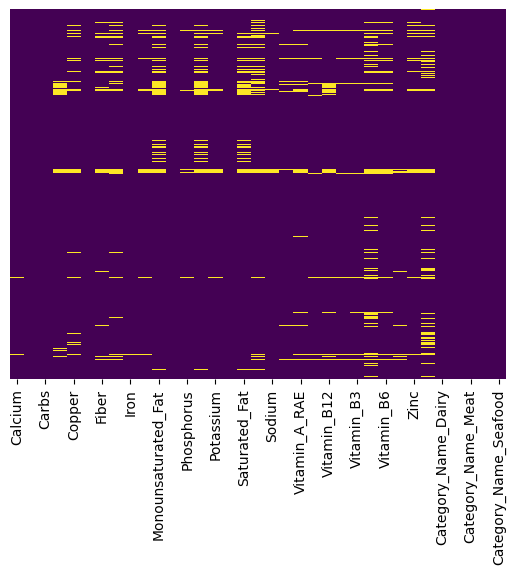

In [67]:
# Use heatmap to visualize missing value (null) positions
df=dummy_df.copy()
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [68]:
# Find missing value percent for each variable
null_percent = df.isnull().sum()/len(df)*100
null_percent

Calcium                           0.520833
Calories                          0.000000
Carbs                             0.000000
Cholesterol                       4.947917
Copper                            5.208333
Fats                              0.000000
Fiber                             4.947917
Folate                            7.031250
Iron                              0.260417
Magnesium                         2.864583
Monounsaturated_Fat              10.156250
Net_carbs                         0.000000
Phosphorus                        1.302083
Polyunsaturated_fat              10.156250
Potassium                         2.343750
Protein                           0.000000
Saturated_Fat                     9.375000
Selenium                          9.375000
Sodium                            1.562500
Vitamin_A_(IU)                    2.083333
Vitamin_A_RAE                     4.427083
Vitamin_B1                        2.083333
Vitamin_B12                       5.208333
Vitamin_B2 

In [69]:
# เติมค่า NaN ด้วย mean ถ้าเป็นตัวเลข, หรือ mode ถ้าเป็น object
df = df.apply(lambda col: col.fillna(col.mean()) if col.dtype != 'O' else col.fillna(col.mode()[0]))

In [70]:
# After replacing missing values, re-check %missing data
df.isnull().sum()/len(df)*100

Calcium                          0.0
Calories                         0.0
Carbs                            0.0
Cholesterol                      0.0
Copper                           0.0
Fats                             0.0
Fiber                            0.0
Folate                           0.0
Iron                             0.0
Magnesium                        0.0
Monounsaturated_Fat              0.0
Net_carbs                        0.0
Phosphorus                       0.0
Polyunsaturated_fat              0.0
Potassium                        0.0
Protein                          0.0
Saturated_Fat                    0.0
Selenium                         0.0
Sodium                           0.0
Vitamin_A_(IU)                   0.0
Vitamin_A_RAE                    0.0
Vitamin_B1                       0.0
Vitamin_B12                      0.0
Vitamin_B2                       0.0
Vitamin_B3                       0.0
Vitamin_B5                       0.0
Vitamin_B6                       0.0
V

In [71]:
X = df[input_vars]
y = df['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]


[7.119700053364276, 0.9989349181120019]

In [85]:
#df = dummy_df.copy()
acceptable_missing_ratio = 10
updated_vars = []
for i in range(0,len(input_vars)):  
    # if %missing value of this feature is less than or at least threshold, keep this feature
    if null_percent.iloc[i] <= acceptable_missing_ratio :          
        updated_vars.append(input_vars[i])
updated_vars

['Calcium',
 'Carbs',
 'Cholesterol',
 'Copper',
 'Fats',
 'Fiber',
 'Folate',
 'Iron',
 'Magnesium',
 'Monounsaturated_Fat',
 'Phosphorus',
 'Polyunsaturated_fat',
 'Protein',
 'Saturated_Fat',
 'Selenium',
 'Sodium',
 'Vitamin_A_(IU)',
 'Vitamin_A_RAE',
 'Vitamin_B1',
 'Vitamin_B12',
 'Vitamin_B2',
 'Vitamin_B3',
 'Vitamin_B5',
 'Vitamin_C',
 'Zinc',
 'Manganese',
 'Category_Name_Fruits',
 'Category_Name_Meat',
 'Category_Name_Oils and Sauces',
 'Category_Name_Seafood']

In [86]:
X = df[updated_vars]
y = df['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[6.210322020591087, 0.9991896216231857]

## Low Variance Filtering

In [87]:
df = dummy_df.copy().dropna()
df.var().sort_values(ascending=False)

Vitamin_A_(IU)                   7.570185e+06
Calories                         3.180495e+04
Fats                             4.354305e+02
Carbs                            1.537483e+02
Net_carbs                        1.340756e+02
Protein                          1.115599e+02
Monounsaturated_Fat              9.910115e+01
Saturated_Fat                    8.257682e+01
Polyunsaturated_fat              2.683947e+01
Fiber                            2.527423e+00
Sodium                           5.395126e-01
Category_Name_Meat               2.039323e-01
Category_Name_Seafood            1.854698e-01
Category_Name_Dairy              1.575553e-01
Category_Name_Fruits             1.345877e-01
Category_Name_Oils and Sauces    1.036950e-01
Calcium                          3.944457e-02
Potassium                        3.918942e-02
Phosphorus                       2.259570e-02
Cholesterol                      2.080215e-02
Magnesium                        7.615108e-04
Vitamin_C                        3

In [88]:
min_var_threshold = 10
updated_vars = [ ]
for i in range(0,len(df[input_vars].var())):

    if df[input_vars].var().iloc[i] >= min_var_threshold:   
        updated_vars.append(df[input_vars].columns[i])
updated_vars

['Carbs',
 'Fats',
 'Monounsaturated_Fat',
 'Net_carbs',
 'Polyunsaturated_fat',
 'Protein',
 'Saturated_Fat',
 'Vitamin_A_(IU)']

In [89]:
df2 = df[updated_vars]
df2['Calories']=df['Calories']
df2.head()

C:\Users\User\AppData\Local\Temp\ipykernel_4188\2018300087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Calories']=df['Calories']


,Carbs,Fats,Monounsaturated_Fat,Net_carbs,Polyunsaturated_fat,Protein,Saturated_Fat,Vitamin_A_(IU),Calories
1,14.0,0.17,0.01,11.0,0.05,0.26,0.03,54.0,52.0
2,11.0,0.39,0.17,9.1,0.08,1.40,0.03,1279.0,48.0
3,63.0,0.51,0.07,55.0,0.07,3.40,0.02,3604.0,241.0
4,8.5,15.00,9.80,1.8,1.80,2.00,2.10,146.0,160.0
5,23.0,0.33,0.03,20.0,0.07,1.10,0.11,64.0,89.0


In [90]:

df2 = df2.dropna()
X = df2[updated_vars]
y = df2['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[4.609324138442176, 0.9995029761946536]

## High Correlation Filtering

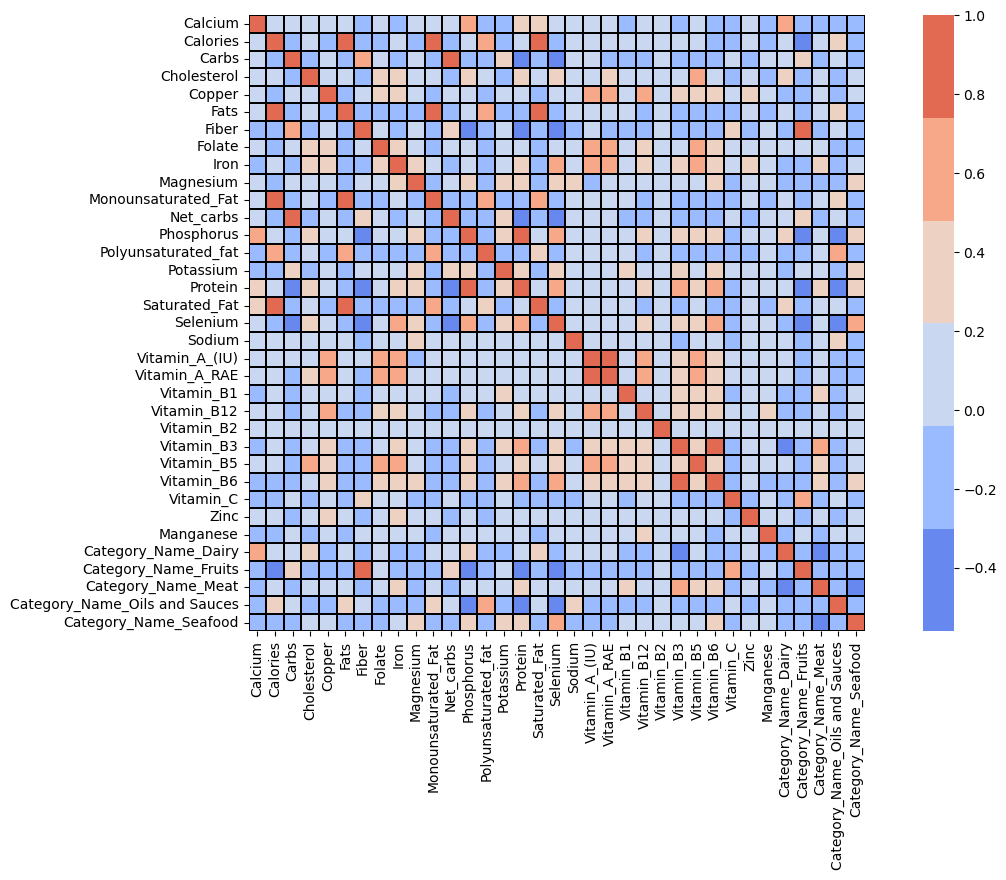

In [147]:
df = dummy_df.copy().dropna()
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),
            square=True,
            linewidths=0.25,    
            linecolor=(0,0,0),
            cmap=sns.color_palette("coolwarm"),
            annot=False)
plt.show()

In [148]:
corr_df = df.corr()
corr_df['Calories']

Calcium                          0.199750
Calories                         1.000000
Carbs                           -0.066555
Cholesterol                      0.156667
Copper                          -0.049662
Fats                             0.967598
Fiber                           -0.196895
Folate                          -0.059261
Iron                            -0.013090
Magnesium                       -0.064136
Monounsaturated_Fat              0.861648
Net_carbs                       -0.044671
Phosphorus                       0.096336
Polyunsaturated_fat              0.673212
Potassium                       -0.162489
Protein                          0.025237
Saturated_Fat                    0.769167
Selenium                        -0.086921
Sodium                           0.025196
Vitamin_A_(IU)                   0.023914
Vitamin_A_RAE                    0.038208
Vitamin_B1                       0.080307
Vitamin_B12                     -0.028963
Vitamin_B2                       0

In [149]:
df = df.dropna()
X = df[input_vars]
y = df['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[27.133747954789584, 0.9827764661247862]

In [150]:
df.shape

(282, 35)

In [151]:
df.drop('Fats', axis=1, inplace=True)
df.shape

(282, 34)

In [152]:
updated_vars = list(input_vars)
updated_vars.remove('Fats')
len(updated_vars )

33

In [153]:
df = df.dropna()
X = df[updated_vars]
y = df['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[81.44830926630026, 0.8448088906873372]

In [157]:
# Selenium เป็นอีกตัวที่ high corr

df=dummy_df.copy()
df.drop('Monounsaturated_Fat', axis=1, inplace=True)
df.shape

(384, 34)

In [158]:
updated_vars = list(input_vars)
updated_vars.remove('Monounsaturated_Fat')
len(updated_vars)

33

In [160]:
updated_vars

['Calcium',
 'Carbs',
 'Cholesterol',
 'Copper',
 'Fats',
 'Fiber',
 'Folate',
 'Iron',
 'Magnesium',
 'Net_carbs',
 'Phosphorus',
 'Polyunsaturated_fat',
 'Potassium',
 'Protein',
 'Saturated_Fat',
 'Selenium',
 'Sodium',
 'Vitamin_A_(IU)',
 'Vitamin_A_RAE',
 'Vitamin_B1',
 'Vitamin_B12',
 'Vitamin_B2',
 'Vitamin_B3',
 'Vitamin_B5',
 'Vitamin_B6',
 'Vitamin_C',
 'Zinc',
 'Manganese',
 'Category_Name_Dairy',
 'Category_Name_Fruits',
 'Category_Name_Meat',
 'Category_Name_Oils and Sauces',
 'Category_Name_Seafood']

In [159]:
df = df.dropna()
X = df[updated_vars]
y = df['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[18.877820355965092, 0.9916630655190934]

# Wrapper Methods

## Forward Feature Selection

In [161]:
df = dummy_df.copy().dropna()
df = df.dropna()

In [163]:
from sklearn.feature_selection import f_regression
fstat, pval = f_regression(df[input_vars], df['Calories'])
fstat

array([1.16363295e+01, 1.24581466e+00, 7.04539925e+00, 6.92270735e-01,
       4.11182194e+03, 1.12927363e+01, 9.86777392e-01, 4.79890421e-02,
       1.15650943e+00, 8.07116498e+02, 5.59850264e-01, 2.62293159e+00,
       2.32083353e+02, 7.59326348e+00, 1.78448712e-01, 4.05631133e+02,
       2.13156019e+00, 1.77872216e-01, 1.60215440e-01, 4.09352650e-01,
       1.81750498e+00, 2.35080965e-01, 2.95010494e-01, 1.60656493e-01,
       1.13003648e-02, 3.35391301e+00, 1.80257195e+01, 6.62703832e-03,
       1.11455700e+00, 3.30719807e+00, 3.68215839e+01, 5.42890135e+00,
       4.36424984e+01, 1.54056101e+01])

In [164]:
pval

array([7.42086854e-004, 2.65310305e-001, 8.40147795e-003, 4.06102127e-001,
       2.10880619e-169, 8.86265521e-004, 3.21388952e-001, 8.26759781e-001,
       2.83116416e-001, 1.84324398e-084, 4.54948582e-001, 1.06455402e-001,
       1.38808213e-038, 6.24299853e-003, 6.73033997e-001, 2.18950769e-056,
       1.45414883e-001, 6.73531849e-001, 6.89263456e-001, 5.22821405e-001,
       1.78700144e-001, 6.28160786e-001, 5.87459553e-001, 6.88858497e-001,
       9.15417933e-001, 6.81078831e-002, 2.96793581e-005, 9.35176741e-001,
       2.92003555e-001, 7.00452726e-002, 4.19152778e-009, 2.05169623e-002,
       1.97980570e-010, 1.09228511e-004])

In [197]:
f_value_threshold = 5 # can adjust this value 
updated_vars = []
for i in range(0,len(input_vars)-1):
    if fstat[i] >= f_value_threshold:
        updated_vars.append(df[input_vars].columns[i])
updated_vars

['Calcium',
 'Cholesterol',
 'Fats',
 'Fiber',
 'Monounsaturated_Fat',
 'Polyunsaturated_fat',
 'Potassium',
 'Saturated_Fat',
 'Vitamin_C',
 'Category_Name_Fruits',
 'Category_Name_Meat',
 'Category_Name_Oils and Sauces']

In [198]:
X = df[updated_vars]
y = df['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[29.50738322439627, 0.9796312637489248]

## Recursive Feature Elimination

In [199]:
df = dummy_df.copy().dropna()
df = df.dropna()

In [270]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X = df[input_vars]
y = df['Calories']
n_features = 26  # define by yourself to select important features

rfe = RFE(LinearRegression(), n_features_to_select=n_features)
model = rfe.fit(X, y)

In [271]:
model.ranking_

array([1, 1, 1, 1, 1, 8, 1, 1, 1, 5, 1, 3, 7, 1, 1, 6, 1, 4, 9, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1])

In [272]:
model.estimator_.coef_

array([ 1.50903256e+00,  2.49423251e+00,  4.58732526e+00,  2.66864454e+02,
        8.89122966e+00, -1.37092054e+03, -6.49902434e+01, -4.98909858e+01,
        1.38426463e+00, -4.33633226e+00,  4.15926704e+00,  2.53440014e+04,
        1.80175386e+01,  3.04213351e+03, -4.12617633e+03,  4.07489720e+01,
       -6.08121809e+01, -7.09110954e+02,  1.96773362e+03,  1.75302962e+01,
        2.48769028e+00, -6.83245870e+01, -9.53279560e-01, -2.42600219e+00,
        2.75082643e+00,  3.33856161e+00])

In [273]:
updated_vars = []
for i in range(0,len(input_vars)-1):
    if model.ranking_[i] == 1:
        updated_vars.append(df[input_vars].columns[i])
updated_vars

['Calcium',
 'Carbs',
 'Cholesterol',
 'Copper',
 'Fats',
 'Folate',
 'Iron',
 'Magnesium',
 'Net_carbs',
 'Potassium',
 'Protein',
 'Selenium',
 'Vitamin_A_RAE',
 'Vitamin_B1',
 'Vitamin_B12',
 'Vitamin_B2',
 'Vitamin_B3',
 'Vitamin_B5',
 'Vitamin_B6',
 'Vitamin_C',
 'Zinc',
 'Manganese',
 'Category_Name_Dairy',
 'Category_Name_Fruits',
 'Category_Name_Meat']

In [274]:
X = df[updated_vars]
y = df['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[6.672115988351646, 0.9989585705241009]

In [275]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X = df[input_vars]
y = df['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
n_features = 10  # define by yourself to select important features

rfe = RFE(LinearRegression(), n_features_to_select=n_features)
model = rfe.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([  207.15298201,   183.63899505,   131.46791149,   268.36232143,
         174.18188626,   293.06428144,   119.34729765,   224.94864416,
         181.86684926,    65.32477801,   115.58927523,   202.37272594,
         190.39553019,   162.89801585,   122.3305533 ,   153.11098904,
         189.02334239,   186.42825766,   183.91146501,   232.59096643,
         334.92932928,   167.27371932,   188.55135456,   188.55135456,
         184.46851139,   151.63004812,   108.11009176,   167.67078645,
         179.70820249,   174.70632438,   285.98496918, 18271.92407866,
         234.13678819,   231.83897483,   195.48384153,   203.98477852,
         204.97219337,   181.56148389,   210.37877706,   256.3243279 ,
         223.25647482,   183.2495805 ,   284.16859429,   159.04471964,
         213.6368903 ,   196.51172067,   152.07551109,   364.31140561,
         202.75644979,   184.71791557,   297.46409339,   208.21522248,
         381.85442145,   188.55135456,   182.56641142,   183.68780055,
      

# Embedded Methods

## Regression & Lasso (L1)

In [307]:
df = dummy_df.copy().dropna()
df = df.dropna()
X = df[input_vars]
y = df['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [308]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[27.133747954789584, 0.9827764661247862]

In [309]:
from sklearn.linear_model import Lasso

## Perform regresssion with embedded lasso 
## set alpha (weight of penalty term) = 1

lasso = Lasso(alpha=1)
model = lasso.fit(X_train, y_train)
y_pred = model.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[4.309234332289112, 0.9995655869001477]

In [279]:
[model.coef_, model.intercept_]

[array([-0.00000000e+00,  1.55884268e+00,  0.00000000e+00,  0.00000000e+00,
         8.90897656e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00,  2.24310761e+00, -0.00000000e+00,
         0.00000000e+00, -0.00000000e+00,  4.14186478e+00,  0.00000000e+00,
         0.00000000e+00, -0.00000000e+00,  4.41792403e-05,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00]),
 2.4845373231050303]

In [280]:
index = np.argsort(model.coef_)
coef = [model.coef_[index[i]] for i in range(len(model.coef_))  if model.coef_[index[i]] != 0]
update_vars = [input_vars[index[i]] for i in range(len(model.coef_))  if model.coef_[index[i]] != 0]
coef

[4.417924034267264e-05,
 1.5588426840244265,
 2.243107606901126,
 4.141864779257761,
 8.908976562233065]

In [281]:
update_vars

['Vitamin_A_(IU)', 'Carbs', 'Net_carbs', 'Protein', 'Fats']

In [282]:
len(update_vars)

5

In [283]:
lasso2 = Lasso(alpha=10)
model2 = lasso2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred2)]

[4.309234332289112, 0.9994471480978195]

In [284]:
[model2.coef_, model2.intercept_]

[array([-0.00000000e+00,  1.21282742e+00,  0.00000000e+00,  0.00000000e+00,
         8.86078476e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00,  2.45011419e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  3.96069600e+00,  0.00000000e+00,
         0.00000000e+00, -0.00000000e+00,  6.65603595e-05,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00]),
 7.011632002929787]

In [285]:
index = np.argsort(model2.coef_)
coef2 = [model2.coef_[index[i]] for i in range(len(model2.coef_))  if model2.coef_[index[i]] != 0]
update_vars2 = [input_vars[index[i]] for i in range(len(model2.coef_))  if model2.coef_[index[i]] != 0]
coef2

[6.656035950915007e-05,
 1.2128274153270278,
 2.4501141857895026,
 3.9606960049249706,
 8.860784757633516]

In [286]:
update_vars2

['Vitamin_A_(IU)', 'Carbs', 'Net_carbs', 'Protein', 'Fats']

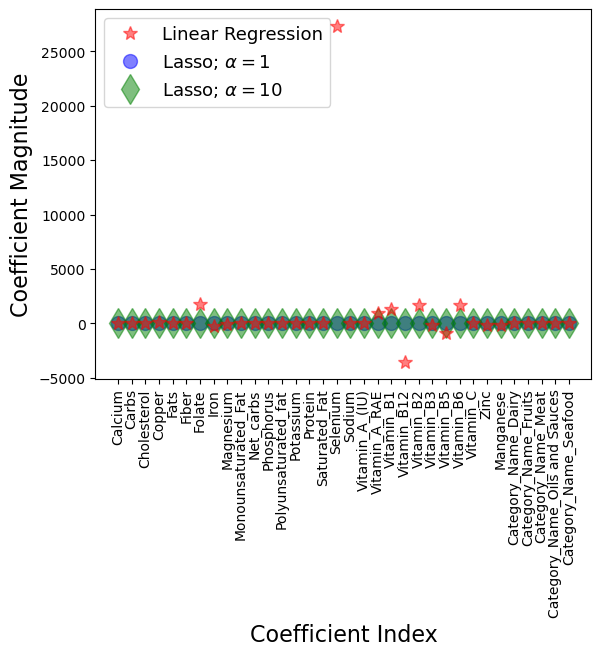

In [288]:
plt.plot(input_vars,lm.coef_,alpha=0.5,linestyle='none',marker='*',markersize=10,color='red',label=r'Linear Regression',zorder=7) # zorder for ordering the markers
plt.plot(input_vars,model.coef_,alpha=0.5,linestyle='none',marker='o',markersize=10,color='blue',label=r'Lasso; $\alpha = 1$') # alpha here is for transparency
plt.plot(input_vars,model2.coef_,alpha=0.5,linestyle='none',marker='d',markersize=15,color='green',label=r'Lasso; $\alpha = 10$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc='upper left')
plt.xticks(input_vars, input_vars, rotation='vertical')
plt.show()

## Regression & Ridge (L2)

In [289]:
from sklearn.linear_model import Ridge

## Perform regresssion with ridge 
## set alpha (weight of penalty term) = 1

X = df[input_vars]
y = df['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

ridge = Ridge(alpha=1.0)
model = ridge.fit(X_train, y_train)
y_pred = model.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[4.381212976294786, 0.9995509533910462]

In [290]:
[model.coef_, model.intercept_]

[array([-5.43748780e-01,  8.49444832e-01, -1.18925729e-01,  1.35399377e-02,
         9.74439508e+00,  1.29775949e+00, -1.31236689e-03, -2.20774175e-01,
        -6.21746834e+00, -8.92288228e-01,  3.01860335e+00, -2.15568667e+00,
        -9.45420394e-01, -5.39317110e+00,  4.17644699e+00, -8.52091411e-01,
         5.17573845e-04, -3.90853875e-01,  1.52929476e-05,  1.85663639e-03,
         5.19895049e-03,  3.32423237e-06, -7.29624229e-03, -1.19264366e-01,
        -5.84849060e-02, -4.37254978e-03,  8.04746402e-01, -2.05060845e-02,
        -1.48241255e-02, -1.29278903e+00, -1.91234852e+00,  1.86562139e+00,
        -6.12778098e-01,  1.95229426e+00]),
 2.4702102853165684]

In [291]:
index = np.argsort(model.coef_)
coef = [model.coef_[index[i]] for i in range(len(model.coef_))  if model.coef_[index[i]] != 0]
update_vars = [input_vars[index[i]] for i in range(len(model.coef_))  if model.coef_[index[i]] != 0]
coef

[-6.217468343994629,
 -5.393171095820634,
 -2.1556866702511055,
 -1.9123485219546739,
 -1.2927890306104768,
 -0.9454203939902639,
 -0.8922882283451161,
 -0.852091410714155,
 -0.6127780983642928,
 -0.5437487802745185,
 -0.3908538748129054,
 -0.22077417515786985,
 -0.1192643660189988,
 -0.11892572931490397,
 -0.05848490603451475,
 -0.020506084466878894,
 -0.014824125452489654,
 -0.007296242286278753,
 -0.004372549782713474,
 -0.0013123668861203617,
 3.324232368707272e-06,
 1.5292947597228378e-05,
 0.0005175738452445414,
 0.0018566363900543827,
 0.005198950485955294,
 0.013539937698374731,
 0.8047464022852684,
 0.8494448318849289,
 1.2977594896368059,
 1.8656213924753666,
 1.9522942584496892,
 3.018603350240631,
 4.1764469944857385,
 9.744395082651122]

In [292]:
update_vars

['Magnesium',
 'Potassium',
 'Phosphorus',
 'Category_Name_Fruits',
 'Category_Name_Dairy',
 'Polyunsaturated_fat',
 'Monounsaturated_Fat',
 'Saturated_Fat',
 'Category_Name_Oils and Sauces',
 'Calcium',
 'Sodium',
 'Iron',
 'Vitamin_B3',
 'Cholesterol',
 'Vitamin_B5',
 'Zinc',
 'Manganese',
 'Vitamin_B2',
 'Vitamin_B6',
 'Folate',
 'Vitamin_B12',
 'Vitamin_A_(IU)',
 'Selenium',
 'Vitamin_A_RAE',
 'Vitamin_B1',
 'Copper',
 'Vitamin_C',
 'Carbs',
 'Fiber',
 'Category_Name_Meat',
 'Category_Name_Seafood',
 'Net_carbs',
 'Protein',
 'Fats']

In [293]:
ridge = Ridge(alpha=10)
model2 = ridge.fit(X_train, y_train)
y_pred = model2.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[4.100525198166825, 0.999606647730206]

In [294]:
[model2.coef_, model2.intercept_]

[array([-5.88502098e-01,  1.64225561e+00,  7.89457202e-02,  7.21062961e-04,
         9.39254845e+00,  2.05645465e-01, -1.48611787e-04, -1.73178961e-02,
        -7.06583667e-01, -5.37989819e-01,  2.19638334e+00, -5.47161894e-01,
        -5.33111637e-01, -1.85429518e+00,  4.14246469e+00, -4.76015964e-01,
         9.34160790e-05, -4.32608920e-01,  1.51271103e-05,  4.65183668e-04,
         4.35254352e-04, -4.23608641e-07, -1.21032708e-03, -1.23755237e-02,
        -7.01727622e-03, -7.05399707e-04,  4.93581022e-02,  7.23263645e-04,
        -9.97140416e-04, -1.14343316e+00, -9.71670345e-01,  1.48559172e+00,
        -2.57514708e-01,  8.87026495e-01]),
 2.3192942754107833]

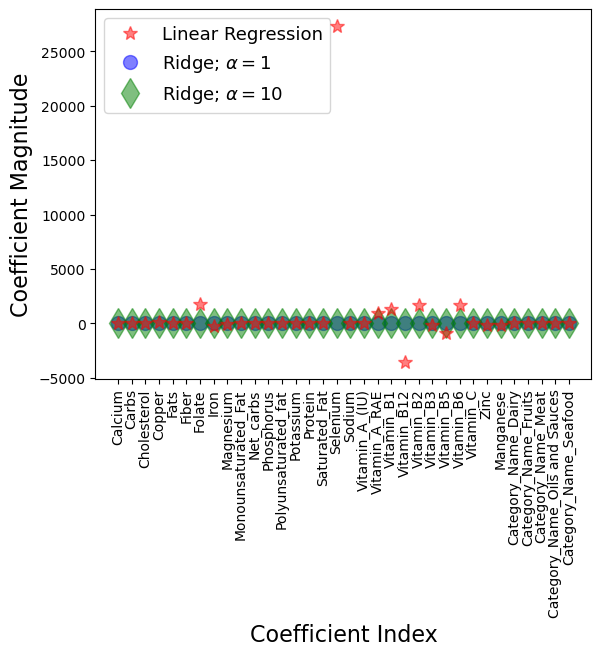

In [296]:
plt.plot(input_vars,lm.coef_,alpha=0.5,linestyle='none',marker='*',markersize=10,color='red',label=r'Linear Regression',zorder=7) # zorder for ordering the markers
plt.plot(input_vars,model.coef_,alpha=0.5,linestyle='none',marker='o',markersize=10,color='blue',label=r'Ridge; $\alpha = 1$') # alpha here is for transparency
plt.plot(input_vars,model2.coef_,alpha=0.5,linestyle='none',marker='d',markersize=15,color='green',label=r'Ridge; $\alpha = 10$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc='upper left')
plt.xticks(input_vars, input_vars, rotation='vertical')
plt.show()

## Random Forest

In [351]:
df = dummy_df.copy().dropna()
df = df.dropna()

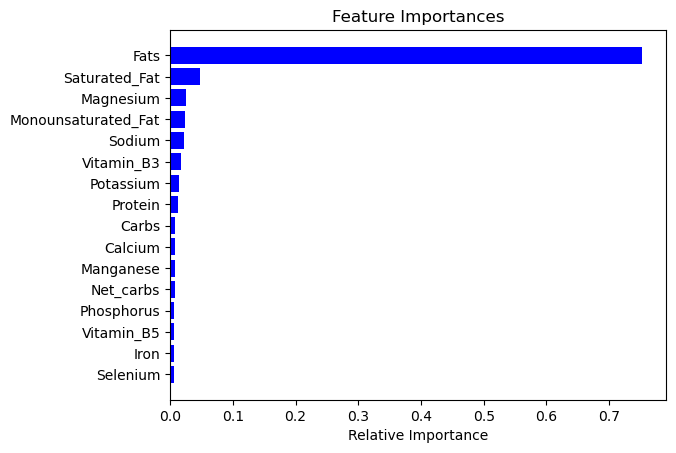

In [352]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=10,n_estimators=100)
model.fit(df[input_vars],df['Calories'])

n_features = 16

# Plot feature importance
features = df[input_vars].columns
importances = model.feature_importances_
indices = np.argsort(importances)[-n_features:]  # sort top n features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [353]:
important_features = [features[i] for i in indices]
important_features
updated_vars = []
for i in range(-1,-n_features-1,-1):
    updated_vars.append(important_features[i])
updated_vars

['Fats',
 'Saturated_Fat',
 'Magnesium',
 'Monounsaturated_Fat',
 'Sodium',
 'Vitamin_B3',
 'Potassium',
 'Protein',
 'Carbs',
 'Calcium',
 'Manganese',
 'Net_carbs',
 'Phosphorus',
 'Vitamin_B5',
 'Iron',
 'Selenium']

In [354]:
X = df[updated_vars]
y = df['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[4.221837387130882, 0.9995830291513246]